In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json

data = json.loads(open("data/account.json").read())
print(data['Basic Information']['Username'])
print(data['Basic Information']['Name'])

perhaps_so
Tan


# Location

In [2]:
location = json.loads(open("data/location_history.json").read())
location

{'Frequent Locations': [{'City': 'brighton', 'Country': 'usa', 'Region': 'mi'},
  {'City': 'brighton', 'Country': 'usa', 'Region': 'mi'}],
 'Latest Location': [{'City': 'brighton', 'Country': 'usa', 'Region': 'mi'}],
 'Home & Work': {},
 'Daily Top Locations': [],
 'Top Locations Per Six-Day Period': [],
 'Location History': [],
 'Businesses and public places you may have visited': [],
 'Areas you may have visited in the last two years': [{'Time': '2021/02/14 16:16:02 UTC',
   'City': 'galloway',
   'Region': 'Ohio',
   'Postal Code': '43119'},
  {'Time': '2021/02/12 03:38:56 UTC',
   'City': 'galloway',
   'Region': 'Ohio',
   'Postal Code': '48104'},
  {'Time': '2021/01/31 15:13:16 UTC',
   'City': 'galloway',
   'Region': 'Ohio',
   'Postal Code': '48197'},
  {'Time': '2021/01/31 04:01:26 UTC',
   'City': 'galloway',
   'Region': 'Ohio',
   'Postal Code': '48212'},
  {'Time': '2020/12/24 20:38:21 UTC',
   'City': 'galloway',
   'Region': 'Ohio',
   'Postal Code': '48242'},
  {'Time'

In [3]:
areas_visited = location['Areas you may have visited in the last two years']
areas_visited

[{'Time': '2021/02/14 16:16:02 UTC',
  'City': 'galloway',
  'Region': 'Ohio',
  'Postal Code': '43119'},
 {'Time': '2021/02/12 03:38:56 UTC',
  'City': 'galloway',
  'Region': 'Ohio',
  'Postal Code': '48104'},
 {'Time': '2021/01/31 15:13:16 UTC',
  'City': 'galloway',
  'Region': 'Ohio',
  'Postal Code': '48197'},
 {'Time': '2021/01/31 04:01:26 UTC',
  'City': 'galloway',
  'Region': 'Ohio',
  'Postal Code': '48212'},
 {'Time': '2020/12/24 20:38:21 UTC',
  'City': 'galloway',
  'Region': 'Ohio',
  'Postal Code': '48242'},
 {'Time': '2021/09/11 03:27:21 UTC',
  'City': 'ann arbor',
  'Region': 'Michigan',
  'Postal Code': '48103'},
 {'Time': '2021/09/10 17:30:04 UTC',
  'City': 'ann arbor',
  'Region': 'Michigan',
  'Postal Code': '48104'},
 {'Time': '2021/10/01 17:59:06 UTC',
  'City': 'ann arbor',
  'Region': 'Michigan',
  'Postal Code': '48105'},
 {'Time': '2020/09/12 20:21:55 UTC',
  'City': 'ann arbor',
  'Region': 'Michigan',
  'Postal Code': '48109'},
 {'Time': '2021/04/16 19:4

In [4]:
location_list = list()

In [5]:
for j in range(len(areas_visited)):
    location_list.append([areas_visited[j]['Time'], areas_visited[j]['City'], areas_visited[j]['Region'], areas_visited[j]['Postal Code']])

In [6]:

location_df = pd.DataFrame (location_list, columns = ['Time', 'City','Region', 'Postal Code'])
location_df

,Time,City,Region,Postal Code
0,2021/02/14 16:16:02 UTC,galloway,Ohio,43119
1,2021/02/12 03:38:56 UTC,galloway,Ohio,48104
2,2021/01/31 15:13:16 UTC,galloway,Ohio,48197
3,2021/01/31 04:01:26 UTC,galloway,Ohio,48212
4,2020/12/24 20:38:21 UTC,galloway,Ohio,48242
...,...,...,...,...
113,2020/04/20 04:02:37 UTC,dayton,Ohio,48109
114,2020/03/02 20:30:43 UTC,dayton,Ohio,48212
115,2021/08/13 19:03:31 UTC,battle creek,Michigan,48104
116,2021/05/17 03:16:52 UTC,battle creek,Michigan,48212


In [7]:
location_df['loc'] = location_df['City'] + ', ' + location_df['Region']

In [8]:
location_df

,Time,City,Region,Postal Code,loc
0,2021/02/14 16:16:02 UTC,galloway,Ohio,43119,"galloway, Ohio"
1,2021/02/12 03:38:56 UTC,galloway,Ohio,48104,"galloway, Ohio"
2,2021/01/31 15:13:16 UTC,galloway,Ohio,48197,"galloway, Ohio"
3,2021/01/31 04:01:26 UTC,galloway,Ohio,48212,"galloway, Ohio"
4,2020/12/24 20:38:21 UTC,galloway,Ohio,48242,"galloway, Ohio"
...,...,...,...,...,...
113,2020/04/20 04:02:37 UTC,dayton,Ohio,48109,"dayton, Ohio"
114,2020/03/02 20:30:43 UTC,dayton,Ohio,48212,"dayton, Ohio"
115,2021/08/13 19:03:31 UTC,battle creek,Michigan,48104,"battle creek, Michigan"
116,2021/05/17 03:16:52 UTC,battle creek,Michigan,48212,"battle creek, Michigan"


In [9]:
pip install pgeocode

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pgeocode

In [11]:
# for index, item in location_df.iterrows():
#     nomi = pgeocode.Nominatim(item.country_code_short.lower())
#     postal_code = location_df['Postal Code']
#     location = nomi.query_postal_code(postal_code)
#     print(location.latitude, location.longitude)

In [12]:
#pip install geopy

In [13]:
from geopy.geocoders import Nominatim

In [14]:
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
location = geolocator.geocode('4550 galloway, Ohio')
print(location)
print((location.latitude, location.longitude))

4550, Galloway Road, Bogart, Perkins Township, Erie County, Ohio, 44870, United States
(41.39761616382542, -82.6461944598625)


In [15]:
def loc_convert_lat(x):
    
    geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
    location = geolocator.geocode(x)
    return location.latitude

def loc_convert_lang(x):
    
    geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
    location = geolocator.geocode(x)
    return location.longitude

def loc_convert_address(x):
    
    geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")
    location = geolocator.geocode(x)
    return location

In [16]:
location_df['address'] = location_df['loc'].apply(loc_convert_address)

In [17]:
location_df['lat'] = location_df['loc'].apply(loc_convert_lat)

In [18]:
location_df['long'] = location_df['loc'].apply(loc_convert_lang)

In [19]:
location_df

,Time,City,Region,Postal Code,loc,address,lat,long
0,2021/02/14 16:16:02 UTC,galloway,Ohio,43119,"galloway, Ohio","(Galloway, Prairie Township, Franklin County, ...",39.913921,-83.163334
1,2021/02/12 03:38:56 UTC,galloway,Ohio,48104,"galloway, Ohio","(Galloway, Prairie Township, Franklin County, ...",39.913921,-83.163334
2,2021/01/31 15:13:16 UTC,galloway,Ohio,48197,"galloway, Ohio","(Galloway, Prairie Township, Franklin County, ...",39.913921,-83.163334
3,2021/01/31 04:01:26 UTC,galloway,Ohio,48212,"galloway, Ohio","(Galloway, Prairie Township, Franklin County, ...",39.913921,-83.163334
4,2020/12/24 20:38:21 UTC,galloway,Ohio,48242,"galloway, Ohio","(Galloway, Prairie Township, Franklin County, ...",39.913921,-83.163334
...,...,...,...,...,...,...,...,...
113,2020/04/20 04:02:37 UTC,dayton,Ohio,48109,"dayton, Ohio","(Dayton, Montgomery County, Ohio, 45423, Unite...",39.758948,-84.191607
114,2020/03/02 20:30:43 UTC,dayton,Ohio,48212,"dayton, Ohio","(Dayton, Montgomery County, Ohio, 45423, Unite...",39.758948,-84.191607
115,2021/08/13 19:03:31 UTC,battle creek,Michigan,48104,"battle creek, Michigan","(Battle Creek, Calhoun County, Michigan, 49014...",42.319255,-85.182427
116,2021/05/17 03:16:52 UTC,battle creek,Michigan,48212,"battle creek, Michigan","(Battle Creek, Calhoun County, Michigan, 49014...",42.319255,-85.182427


In [20]:
location_df['Time'] = pd.to_datetime(location_df['Time'])


In [21]:
location_df.dtypes

Time           datetime64[ns, UTC]
City                        object
Region                      object
Postal Code                 object
loc                         object
address                     object
lat                        float64
long                       float64
dtype: object

In [22]:
# create count column and populate with 1 for grouping and summing
location_df['count'] = 1

# create hours column to utilize later in HeatMapWithTime
location_df['hour'] = location_df['Time'].dt.hour

# view latitude, longitude and count columns, groupby latitude and longitude summing up total for each xy coordinate
dataf2 = pd.DataFrame(
    location_df.groupby(['loc', 'lat', 'long'])\
    ['count'].sum().sort_values(ascending=False))

# create list of lat/long for input into folium HeatMap
lst = dataf2.groupby(
    ['lat', 'long'])\
    .sum().reset_index().values.tolist()

In [23]:
lst

[[29.7589382, -95.3676974, 4.0],
 [32.701938999999996, -97.10562379033699, 1.0],
 [33.1031744, -96.6705503, 3.0],
 [33.5831662, -84.3393683, 3.0],
 [33.7489924, -84.3902644, 4.0],
 [34.0709576, -84.2747329, 3.0],
 [34.1112226, -82.8670839, 2.0],
 [38.8903961, -77.0841585, 2.0],
 [39.0570022, -84.9013402, 1.0],
 [39.7589478, -84.1916069, 9.0],
 [39.8208998, -84.0193858, 2.0],
 [39.9139207, -83.1633336, 5.0],
 [39.9622601, -83.0007065, 4.0],
 [40.6526006, -73.9497211, 3.0],
 [40.7127281, -74.0060152, 2.0],
 [40.76639995, -73.7738780089654, 9.0],
 [40.8466508, -73.8785937, 10.0],
 [41.083064, -81.518485, 5.0],
 [41.3922726, -84.1252243, 2.0],
 [41.6067651, -71.9809081, 3.0],
 [41.6529143, -83.5378173, 3.0],
 [41.8755616, -87.6244212, 1.0],
 [41.8975152, -84.0373054, 1.0],
 [41.8994745, -87.9403418, 3.0],
 [42.2681569, -83.7312291, 4.0],
 [42.3192548, -85.1824269, 3.0],
 [42.3222599, -83.1763145, 2.0],
 [42.3315509, -83.0466403, 8.0],
 [42.3928151, -83.0496438, 2.0],
 [42.4055981, -83.0965

In [24]:
dataf2

,,,count
loc,lat,long,
"bronx, New York",40.846651,-73.878594,10
"dayton, Ohio",39.758948,-84.191607,9
"queens, New York",40.766400,-73.773878,9
"detroit, Michigan",42.331551,-83.046640,8
"galloway, Ohio",39.913921,-83.163334,5
"akron, Ohio",41.083064,-81.518485,5
"brighton, Michigan",42.531692,-83.784646,4
"houston, Texas",29.758938,-95.367697,4
"highland park, Michigan",42.405598,-83.096583,4


In [25]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [31]:
import folium

# function to generate base map, has default values for zoom and tiles
def generateBaseMap(loc, zoom=12, min_zoom=0, max_zoom=18, zoom_start=10, tiles='Stamen Toner', crs='ESPG2263'):
    '''
    Function that generates a Folium base map
    Input location lat/long
    Zoom level default 12
    Tiles default to Stamen Toner
    CRS default 2263 for NYC
    '''
    return folium.Map(location=loc, 
                      control_scale=True, 
                      zoom_start=zoom,
                      tiles=tiles)
  
nyc = [40.7400, -73.985880] # generic nyc lat/lon in list format
base_map = generateBaseMap(nyc) # pass lat/lon to function
base_map

In [26]:

# import HeatMap plugin
from folium.plugins import HeatMap

# add data to basemap which we created above with custom function
HeatMap(data=lst, radius=12).add_to(base_map);

# save base map as .html
base_map.save('bike_station_HeatMap.html')

# call map 
base_map

In [28]:
df_hour_list = [] # create blank list

# loop through each hour
for hour in location_df['Time'].sort_values().unique(): 
    df_hour_list.append(location_df.loc[location_df['Time'] == hour, # for each hour append to list  
    ['lat', 'long', 'count']]\
    .groupby(['lat', 'long'])\
    .sum().reset_index().values.tolist()) #sum totals per station, reset index and create list
    
# preview output
df_hour_list

[[[29.7589382, -95.3676974, 1.0]],
 [[39.7589478, -84.1916069, 1.0]],
 [[39.7589478, -84.1916069, 1.0]],
 [[42.4055981, -83.0965829, 1.0]],
 [[42.4055981, -83.0965829, 1.0]],
 [[29.7589382, -95.3676974, 1.0]],
 [[42.4055981, -83.0965829, 1.0]],
 [[39.7589478, -84.1916069, 1.0]],
 [[42.4055981, -83.0965829, 1.0]],
 [[47.6694141, -122.1238767, 1.0]],
 [[41.8994745, -87.9403418, 1.0]],
 [[39.9622601, -83.0007065, 1.0]],
 [[39.9622601, -83.0007065, 1.0]],
 [[39.8208998, -84.0193858, 1.0]],
 [[29.7589382, -95.3676974, 1.0]],
 [[29.7589382, -95.3676974, 1.0]],
 [[41.8994745, -87.9403418, 1.0]],
 [[41.8994745, -87.9403418, 1.0]],
 [[39.9622601, -83.0007065, 1.0]],
 [[41.3922726, -84.1252243, 1.0]],
 [[41.3922726, -84.1252243, 1.0]],
 [[39.9622601, -83.0007065, 1.0]],
 [[32.701938999999996, -97.10562379033699, 1.0]],
 [[33.1031744, -96.6705503, 1.0]],
 [[33.1031744, -96.6705503, 1.0]],
 [[33.1031744, -96.6705503, 1.0]],
 [[33.7489924, -84.3902644, 1.0]],
 [[42.2681569, -83.7312291, 1.0]],
 [[3

In [29]:
# create 2nd base map for heat map with time
base_map_2 = generateBaseMap(nyc)

In [30]:
# create a more meaningful index for heat map with time

# start = datetime(2021,1,1,0)
# end = datetime(2021,1,1,23)
daterange = pd.date_range(start=5/5/2021,
                          end=5/29/2021) # use pandas daterange function to generate date range object

time_index = [d.strftime("%I:%M %p") for d in daterange] # format time with AM/PM

In [32]:
# # instantiate HeatMapWithTime
# HeatMapWithTime(df_hour_list,radius=11,
#                 index=time_index,
#                 gradient={0.1: 'blue', 0.5: 'lime', 0.7: 'orange', 1: 'red'}, 
#                 min_opacity=0.4, 
#                 max_opacity=0.8, 
#                 use_local_extrema=True)\
#                 .add_to(base_map_2)

# # save as html
# base_map_2.save('./images/heatmapwithtime_bikeshare.html')

# # call result
# base_map_2

## User Profile

In [2]:
up = json.loads(open("data/user_profile.json").read())

In [3]:
up

{'App Profile': {'Country': 'US',
  'Creation Time': '2018-06-19 03:06:56 UTC',
  'Account Creation Country': 'US',
  'Platform Version': 'ANDROID',
  'In-app Language': 'en'},
 'Demographics': {'Cohort Age': '', 'Derived Ad Demographic': ''},
 'Subscriptions': [],
 'Engagement': [{'Event': 'Geolens Swipes', 'Occurrences': 1},
  {'Event': 'Direct Snaps Created', 'Occurrences': 31},
  {'Event': 'Chats Sent', 'Occurrences': 847},
  {'Event': 'Discover Snap Views', 'Occurrences': 26},
  {'Event': 'Snap Sends', 'Occurrences': 19},
  {'Event': 'Story Views', 'Occurrences': 13},
  {'Event': 'Discover Editions Viewed', 'Occurrences': 4},
  {'Event': 'Story Ads Viewed', 'Occurrences': 4},
  {'Event': 'Application Opens', 'Occurrences': 745},
  {'Event': 'Geofilter Swipes', 'Occurrences': 14},
  {'Event': 'Snaps Viewed in a Story', 'Occurrences': 14},
  {'Event': 'Geofilter Story Snaps Viewed', 'Occurrences': 7},
  {'Event': 'Chats Viewed', 'Occurrences': 1785},
  {'Event': 'Direct Snaps Viewed

In [4]:
web_engagement = up['Engagement']
web_engagement

[{'Event': 'Geolens Swipes', 'Occurrences': 1},
 {'Event': 'Direct Snaps Created', 'Occurrences': 31},
 {'Event': 'Chats Sent', 'Occurrences': 847},
 {'Event': 'Discover Snap Views', 'Occurrences': 26},
 {'Event': 'Snap Sends', 'Occurrences': 19},
 {'Event': 'Story Views', 'Occurrences': 13},
 {'Event': 'Discover Editions Viewed', 'Occurrences': 4},
 {'Event': 'Story Ads Viewed', 'Occurrences': 4},
 {'Event': 'Application Opens', 'Occurrences': 745},
 {'Event': 'Geofilter Swipes', 'Occurrences': 14},
 {'Event': 'Snaps Viewed in a Story', 'Occurrences': 14},
 {'Event': 'Geofilter Story Snaps Viewed', 'Occurrences': 7},
 {'Event': 'Chats Viewed', 'Occurrences': 1785},
 {'Event': 'Direct Snaps Viewed', 'Occurrences': 5},
 {'Event': 'Snap Views', 'Occurrences': 49}]

In [5]:
engage_list = list()

In [12]:
for i in range(len(web_engagement)):
    engage_list.append([web_engagement[i]['Event'], web_engagement[i]['Occurrences']])

In [13]:
df2 = pd.DataFrame (engage_list, columns = ['Activities', 'Occurences'])
df2

,Activities,Occurences
0,Geolens Swipes,1
1,Direct Snaps Created,31
2,Chats Sent,847
3,Discover Snap Views,26
4,Snap Sends,19
5,Story Views,13
6,Discover Editions Viewed,4
7,Story Ads Viewed,4
8,Application Opens,745
9,Geofilter Swipes,14


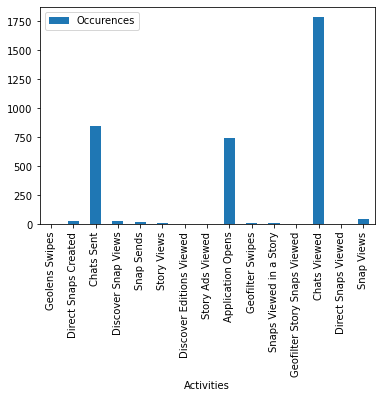

In [14]:
df2.plot(kind='bar')
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
labels = ("Geolens Swipes", "Direct Snaps Created", "Chats Sent", "Discover Snap Views", "Snap Sends", "Story Views", "Discover Editions Viewed", "Story Ads Viewed", "Application Opens", "Geofilter Swipes", "Snaps Viewed in a Story", "Geofilter Story Snaps Viewed", "Chats Viewed", "Direct Snaps Viewed", "Snap Views")
plt.xticks(positions, labels)
plt.xlabel('Activities')
plt.show()

<ipython-input-15-7ea9c8e017f6>:22: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.2, .5),


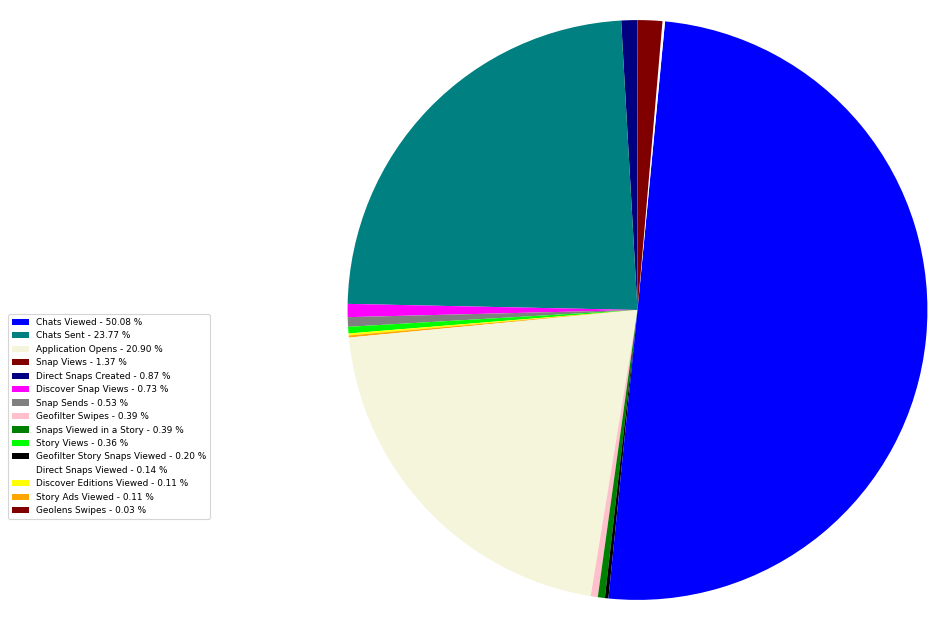

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

x = np.char.array(["Geolens Swipes", "Direct Snaps Created", "Chats Sent", "Discover Snap Views", "Snap Sends", "Story Views", "Discover Editions Viewed", "Story Ads Viewed", "Application Opens", "Geofilter Swipes", "Snaps Viewed in a Story", "Geofilter Story Snaps Viewed", "Chats Viewed", "Direct Snaps Viewed", "Snap Views"])
y = np.array([1,31,847,26,19,13,4,4,745,14,14,7,1785,5,49])
colors = ['Maroon', 'Navy', 'Teal', 'Magenta', 'Grey', 'Lime', 'Yellow', 'Orange', 'Beige', 'Pink', 'Green', 'Black', 'Blue', 'White']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y,  colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.2, .5),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [10]:
#pip install wordfreq

In [27]:
interest.head()

AttributeError: 'list' object has no attribute 'head'

In [11]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordfreq import word_frequency

In [12]:
interest = up['Interest Categories']
interest

['Premium Credit Card Owners',
 'Collegiates',
 'Big Box Store Buyers',
 'Techies & Gadget Fans',
 'Last 12 Months Buyers - Apple',
 'RTE Cereal Buyers - Kelloggs Brands - Kelloggs Frosted Flakes',
 'Mobile Gamers - Mid-Core and Hardcore',
 'eCommerce Buyers - Amazon - All Buyers',
 'Household Supplies - Food Storage & Wraps Buyers',
 'Cat Owner',
 'Facial Cleanser & Moisturizer Buyers',
 'Household Supplies - Disposable Dish Buyers',
 'Insurance Buyers - Metlife',
 'Meat & Fish Sauce Buyers',
 'Shampoo & Conditioner Buyers - Head & Shoulders Brands',
 'Indie & Foreign Film Fans',
 'Local Turnout Likely',
 'RTE Cereal Buyers - Kelloggs Brands - Kelloggs Corn Pops',
 'Department Store Shoppers',
 'TV Network Viewers (A&E)',
 'TV Viewers (Christmas Specials)',
 'Household Supplies - Household Cleaning Buyers - Clorox Brands',
 'Moneyminders',
 'Activist Likely Flag',
 'Investment Service Shoppers',
 'Mobile Gamers - Trivia',
 'Baby & Toddler - Disposable Diaper & Training Pant Buyers',
 

In [13]:
df3 = pd.DataFrame(interest, columns=['Category'])

In [14]:
df3

,Category
0,Premium Credit Card Owners
1,Collegiates
2,Big Box Store Buyers
3,Techies & Gadget Fans
4,Last 12 Months Buyers - Apple
...,...
444,Retail Store Visitors
445,RTE Cereal Buyers - Post Brands - Post Honey B...
446,Salad Dressing Buyers
447,Salty Snacks Buyers - Cheetos Brands


In [15]:
# Python program to generate WordCloud for column BLOOM

# Text of all words in column bloom

text = " ".join(review for review in df3.Category.astype(str))
print ("There are {} words in the combination of all cells in column Category.".format(len(text)))

There are 13058 words in the combination of all cells in column Category.


In [16]:
text

"Premium Credit Card Owners Collegiates Big Box Store Buyers Techies & Gadget Fans Last 12 Months Buyers - Apple RTE Cereal Buyers - Kelloggs Brands - Kelloggs Frosted Flakes Mobile Gamers - Mid-Core and Hardcore eCommerce Buyers - Amazon - All Buyers Household Supplies - Food Storage & Wraps Buyers Cat Owner Facial Cleanser & Moisturizer Buyers Household Supplies - Disposable Dish Buyers Insurance Buyers - Metlife Meat & Fish Sauce Buyers Shampoo & Conditioner Buyers - Head & Shoulders Brands Indie & Foreign Film Fans Local Turnout Likely RTE Cereal Buyers - Kelloggs Brands - Kelloggs Corn Pops Department Store Shoppers TV Network Viewers (A&E) TV Viewers (Christmas Specials) Household Supplies - Household Cleaning Buyers - Clorox Brands Moneyminders Activist Likely Flag Investment Service Shoppers Mobile Gamers - Trivia Baby & Toddler - Disposable Diaper & Training Pant Buyers Health & Beauty Buyers Drug Store Buyers - CVS Pharmacy Family Genre Fans TV Viewers (Educational) Parks & G

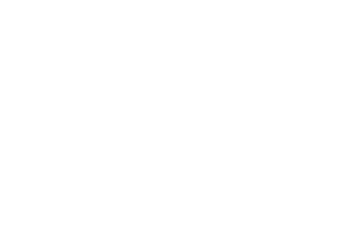

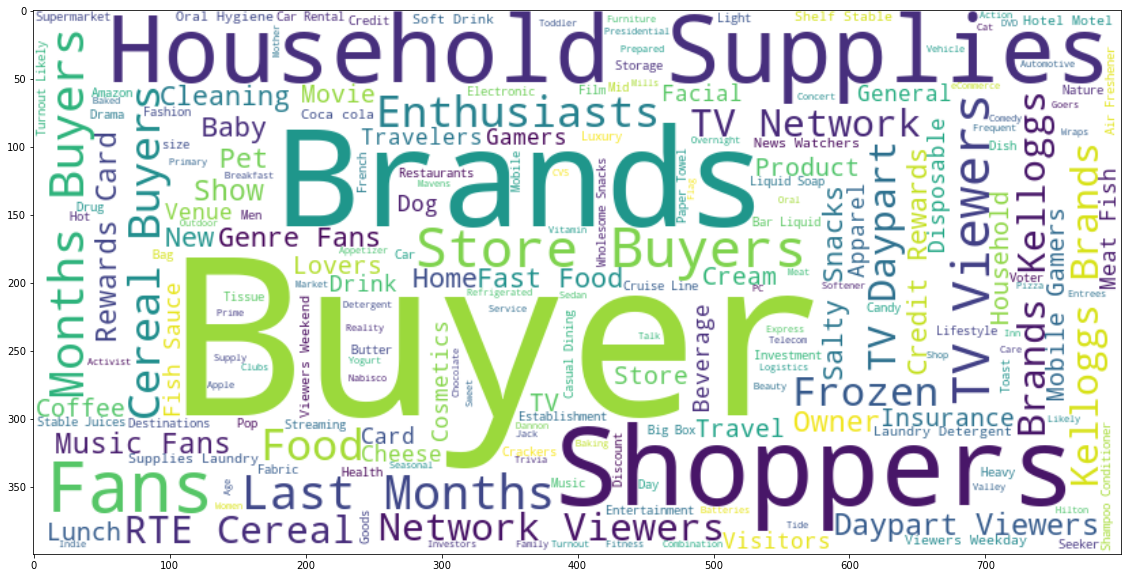

In [17]:
# Create stopword list:
# remove words that we want to exclude

stopwords = set(STOPWORDS)
stopwords.update(["bloom", "rose", "petals", "Average", "diameter","flushes", 'throughout', "Blooms", "form"])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [33]:
interaction = up['Interactions']['Web Interactions']

In [34]:
df4 = pd.DataFrame(interaction, columns=['website'])
df4

,website
0,subway.com
1,minehut.com
2,homedepot.com
3,nampons.com
4,clarinsusa.com
...,...
697,pelacase.com
698,seeker.com
699,amcplus.com
700,christianplanner.com


## Chat History

In [18]:
with open('data/chat_history.json') as data_file:    
    data = json.load(data_file)  

In [19]:
df = pd.json_normalize(data, 'Received Chat History', 
                    record_prefix='locations')

df = df.drop(columns=['locationsText'])

df.head(2)

,locationsFrom,locationsMedia Type,locationsCreated
0,plants_greene,TEXT,2021-10-05 04:35:53 UTC
1,plants_greene,MEDIA,2021-10-05 04:35:46 UTC


In [20]:
df['locationsCreated'] = pd.to_datetime(df['locationsCreated'])

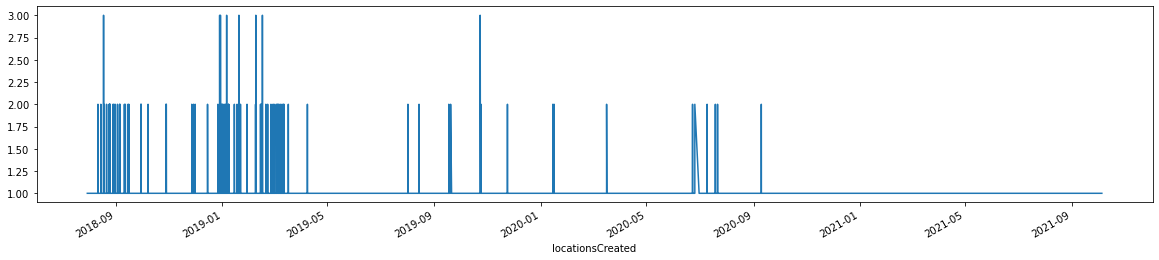

In [21]:
fig, ax = plt.subplots(figsize=(20,4))
df.groupby('locationsCreated')['locationsCreated'].count().plot(kind='line')

<ipython-input-22-24eb1857cafa>:22: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),


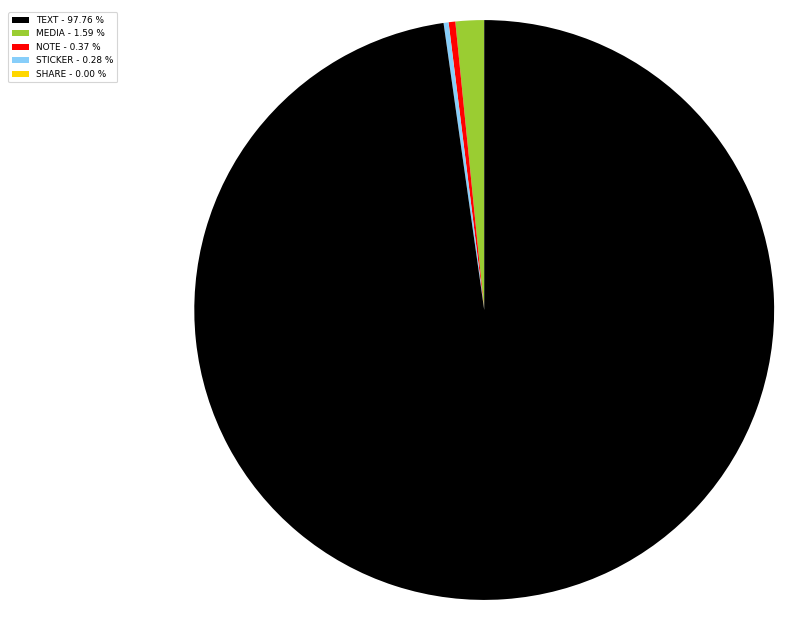

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)

x = np.char.array(['MEDIA', 'NOTE', 'SHARE', 'STICKER', 'TEXT'])
y = np.array([364, 85, 1, 63, 22362])
colors = ['yellowgreen','red','gold','lightskyblue','black']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [23]:
df.groupby('locationsMedia Type')['locationsMedia Type'].count()

locationsMedia Type
MEDIA        364
NOTE          85
SHARE          1
STICKER       63
TEXT       22362
Name: locationsMedia Type, dtype: int64

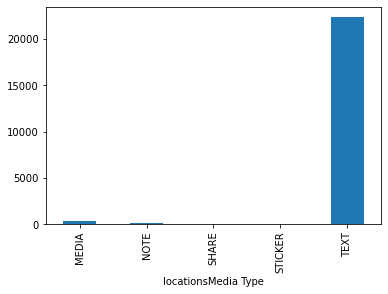

In [24]:
df.groupby('locationsMedia Type')['locationsMedia Type'].count().plot(kind='bar')
plt.show()